# Overview
**Sumber**

Hendratno, “COVID-19 Indonesia Dataset.” Kaggle, doi: 10.34740/KAGGLE/DSV/1314265. (https://www.kaggle.com/hendratno/covid19-indonesia)

**Context**

The COVID-19 dataset in Indonesia was created to find out various factors that could be taken into consideration in decision making related to the level of stringency in each province in Indonesia.

**Content**

Data compiled based on time series, both on a country level (Indonesia), and on a province level. If needed in certain provinces, it might also be provided at the city / regency level. Demographic data is also available, as well as calculations between demographic data and COVID-19 pandemic data.

**Acknowledgements**

Thank you to those who have provided data openly so that we can compile it into a dataset here, which is as follows: covid19.go.id, kemendagri.go.id, bps.go.id, and bnpb-inacovid19.hub.arcgis.com

**About this file**
The COVID-19 pandemic dataset in Indonesia, time series. This dataset is a compilation of various open data sources, including: covid19.go.id (pandemic data), kemendagri.go.id (demographic data), bps.go.id (demographic data), as well as some calculations of the relationship of the data.

This dataset contains a time series of COVID-19 pandemic events in Indonesia, at the country level to province level. If possible, in the future I will provide it to the city/regency level.

# Import Standard Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Persiapan Data

In [2]:
df = pd.read_csv('data/covid19-timeseries.csv',parse_dates=['Date'])

In [3]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,3,0,0,3,501,20,39,...,106.836118,-6.204699,0.28,46.19,0.0,1.84,3.99%,7.78%,NaN,NaN
1,2020-03-01,ID-JB,Jawa Barat,3,0,0,3,3,5,4,...,107.603708,-6.920432,0.07,0.07,0.0,0.11,166.67%,133.33%,NaN,NaN
2,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,503,20,39,...,106.836118,-6.204699,0.18,46.38,0.0,1.84,3.98%,7.75%,0.67,1.0
3,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
4,2020-03-02,ID-JB,Jawa Barat,0,0,0,0,3,5,4,...,107.603708,-6.920432,0.00,0.07,0.0,0.11,166.67%,133.33%,0.00,1.0


In [4]:
df.head().T

,0,1,2,3,4
Date,2020-03-01 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-02 00:00:00,2020-03-02 00:00:00
Location ISO Code,ID-JK,ID-JB,ID-JK,IDN,ID-JB
Location,DKI Jakarta,Jawa Barat,DKI Jakarta,Indonesia,Jawa Barat
New Cases,3,3,2,2,0
New Deaths,0,0,0,0,0
New Recovered,0,0,0,0,0
New Active Cases,3,3,2,2,0
Total Cases,501,3,503,2,3
Total Deaths,20,5,20,0,5
Total Recovered,39,4,39,0,4


In [5]:
df['Location'].unique(),len(df['Location'].unique())

(array(['DKI Jakarta', 'Jawa Barat', 'Indonesia', 'Banten',
        'Sulawesi Tenggara', 'Kalimantan Timur',
        'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Tengah',
        'Jawa Timur', 'Sulawesi Selatan', 'Maluku', 'Papua',
        'Maluku Utara', 'Aceh', 'Kalimantan Tengah', 'Lampung',
        'Sulawesi Tengah', 'Sumatera Barat', 'Papua Barat',
        'Kalimantan Utara', 'Sulawesi Barat', 'Sumatera Selatan', 'Bali',
        'Kalimantan Barat', 'Riau', 'Jambi', 'Kalimantan Selatan',
        'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Bengkulu',
        'Nusa Tenggara Barat', 'Sulawesi Utara', 'Nusa Tenggara Timur',
        'Gorontalo'], dtype=object),
 35)

# Pembersihan & Pemilihan Data

In [6]:
parameter = ['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases','Case Fatality Rate','Case Recovered Rate']
# parameter = ['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases']

In [7]:
dataframe = pd.DataFrame(columns=parameter)

In [8]:
dataframe.head()

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Case Fatality Rate,Case Recovered Rate


In [9]:
for param in parameter:
    dataframe[param] = df[param][df.Location == 'Indonesia']

In [10]:
dataframe.reset_index(inplace=True,drop=True)

In [11]:
dataframe.tail()

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Case Fatality Rate,Case Recovered Rate
123,2020-07-03,60695,3036,27568,30091,5.00%,45.42%
124,2020-07-04,62142,3089,28219,30834,4.97%,45.41%
125,2020-07-05,63749,3171,29105,31473,4.97%,45.66%
126,2020-07-06,64958,3241,29919,31798,4.99%,46.06%
127,2020-07-07,66226,3309,30785,32132,5.00%,46.48%


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 128 non-null    datetime64[ns]
 1   Total Cases          128 non-null    int64         
 2   Total Deaths         128 non-null    int64         
 3   Total Recovered      128 non-null    int64         
 4   Total Active Cases   128 non-null    int64         
 5   Case Fatality Rate   128 non-null    object        
 6   Case Recovered Rate  128 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 7.1+ KB


# Konversi Data ke Numerical

In [13]:
percent_data = ['Case Fatality Rate','Case Recovered Rate']

In [14]:
for col in percent_data:
    temp = []
    for row in range(len(dataframe[col])):
        temp.append(float(dataframe[col][row][:-1]))
    dataframe.drop([col],axis=1,inplace=True)
    dataframe[col] = temp

In [15]:
dataframe['Day'] = dataframe.Date.dt.day
dataframe['Month'] = dataframe.Date.dt.month
dataframe['Year'] = dataframe.Date.dt.year
# dataframe['DayOfWeek'] = dataframe.Date.dt.dayofweek
# dataframe['DayOfYear'] = dataframe.Date.dt.dayofyear

In [16]:
dataframe.tail()

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Case Fatality Rate,Case Recovered Rate,Day,Month,Year
123,2020-07-03,60695,3036,27568,30091,5.00,45.42,3,7,2020
124,2020-07-04,62142,3089,28219,30834,4.97,45.41,4,7,2020
125,2020-07-05,63749,3171,29105,31473,4.97,45.66,5,7,2020
126,2020-07-06,64958,3241,29919,31798,4.99,46.06,6,7,2020
127,2020-07-07,66226,3309,30785,32132,5.00,46.48,7,7,2020


In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 128 non-null    datetime64[ns]
 1   Total Cases          128 non-null    int64         
 2   Total Deaths         128 non-null    int64         
 3   Total Recovered      128 non-null    int64         
 4   Total Active Cases   128 non-null    int64         
 5   Case Fatality Rate   128 non-null    float64       
 6   Case Recovered Rate  128 non-null    float64       
 7   Day                  128 non-null    int64         
 8   Month                128 non-null    int64         
 9   Year                 128 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 10.1 KB


# Visualisasi Data

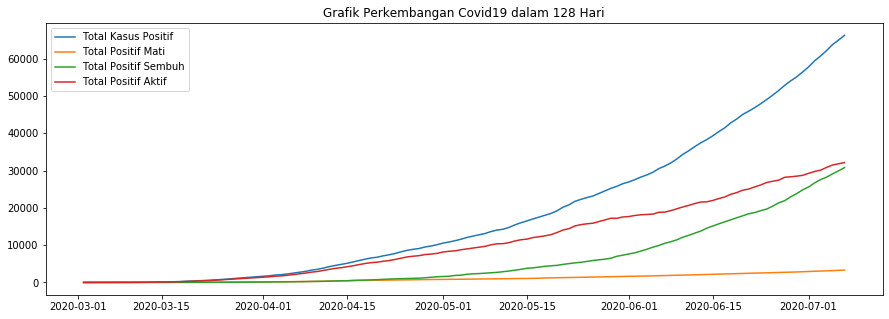

In [18]:
plt.figure(figsize=(15,5))
plt.title('Grafik Perkembangan Covid19 dalam 128 Hari')
plt.plot(dataframe['Date'],dataframe['Total Cases'],label='Total Kasus Positif')
plt.plot(dataframe['Date'],dataframe['Total Deaths'],label='Total Positif Mati')
plt.plot(dataframe['Date'],dataframe['Total Recovered'],label='Total Positif Sembuh')
plt.plot(dataframe['Date'],dataframe['Total Active Cases'],label='Total Positif Aktif')
plt.legend()

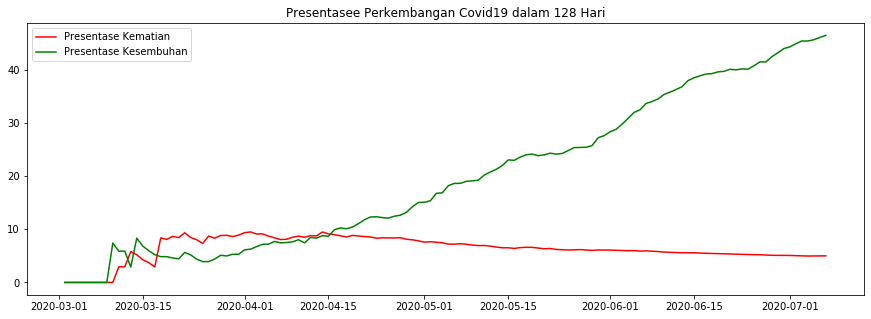

In [19]:
plt.figure(figsize=(15,5))
plt.title('Presentasee Perkembangan Covid19 dalam 128 Hari')
plt.plot(dataframe['Date'],dataframe['Case Fatality Rate'],'r',label='Presentase Kematian')
plt.plot(dataframe['Date'],dataframe['Case Recovered Rate'],'g',label='Presentase Kesembuhan')
plt.legend()

# Split Data

In [20]:
case_x = dataframe.drop(['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases','Case Fatality Rate','Case Recovered Rate'],axis=1)
case_y = dataframe['Total Cases']

In [21]:
death_x = dataframe.drop(['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases','Case Fatality Rate','Case Recovered Rate'],axis=1)
death_y = dataframe['Total Deaths']

In [22]:
recovered_x = dataframe.drop(['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases','Case Fatality Rate','Case Recovered Rate'],axis=1)
recovered_y = dataframe['Total Recovered']

In [23]:
active_x = dataframe.drop(['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases','Case Fatality Rate','Case Recovered Rate'],axis=1)
active_y = dataframe['Total Active Cases']

In [24]:
rate_recovered_x = dataframe.drop(['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases','Case Fatality Rate','Case Recovered Rate'],axis=1)
rate_recovered_y = dataframe['Case Recovered Rate']

In [25]:
rate_fatality_x = dataframe.drop(['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases','Case Fatality Rate','Case Recovered Rate'],axis=1)
rate_fatality_y = dataframe['Case Fatality Rate']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
case_x_train,case_x_test,case_y_train,case_y_test = train_test_split(case_x,case_y,test_size=0.2)

In [28]:
death_x_train,death_x_test,death_y_train,death_y_test = train_test_split(death_x,death_y,test_size=0.2)

In [29]:
recovered_x_train,recovered_x_test,recovered_y_train,recovered_y_test = train_test_split(recovered_x,recovered_y,test_size=0.2)

In [30]:
active_x_train,active_x_test,active_y_train,active_y_test = train_test_split(active_x,active_y,test_size=0.2)

In [31]:
rate_recovered_x_train,rate_recovered_x_test,rate_recovered_y_train,rate_recovered_y_test = train_test_split(rate_recovered_x,rate_recovered_y,test_size=0.2)

In [32]:
rate_fatality_x_train,rate_fatality_x_test,rate_fatality_y_train,rate_fatality_y_test = train_test_split(rate_fatality_x,rate_fatality_y,test_size=0.2)

# Sorting Kembali Test Data

In [112]:
semua_data = [
    [case_x_train,case_x_test,case_y_train,case_y_test,'Total Kasus'],
    [death_x_train,death_x_test,death_y_train,death_y_test,'Total Kematian'],
    [recovered_x_train,recovered_x_test,recovered_y_train,recovered_y_test,'Total Sembuh'],
    [active_x_train,active_x_test,active_y_train,active_y_test,'Total Aktif'],
    [rate_recovered_x_train,rate_recovered_x_test,rate_recovered_y_train,rate_recovered_y_test,'Tingkat Kesembuhan'],
    [rate_fatality_x_train,rate_fatality_x_test,rate_fatality_y_train,rate_fatality_y_test,'Tingkat Kematian']
]

In [113]:
for data in semua_data:
    data[1] = data[1].sort_index()
    data[3] = data[3].sort_index()

# Machine Learning Model

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
model = RandomForestRegressor(n_estimators=10)

In [99]:
model.fit(case_x_train,case_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [100]:
prediction = model.predict(case_x_test)

In [101]:
def visualisasiPrediksi(y_true,y_pred):
    figure,axes = plt.subplots(ncols=1,nrows=2,figsize=(15,6))
    axes[0].set_title('Prediksi vs Aktual')
    axes[0].plot([i for i in range(len(y_true))],y_true,'r',label='Aktual')
    axes[0].plot([i for i in range(len(y_pred))],y_pred,'b',label='Prediksi')
    axes[0].legend()
    
    selisih = abs(y_true-y_pred)
    axes[1].set_title('Selisih')
    axes[1].plot([i for i in range(len(selisih))],selisih,label='Nilai Selisih')
    axes[1].plot([i for i in range(len(selisih))],[np.mean(selisih) for i in range(len(selisih))],'--',label='Mean')
    axes[1].plot([i for i in range(len(selisih))],[np.median(selisih) for i in range(len(selisih))],'--',label='Median')
    axes[1].legend()
    plt.show()

**Prediksi vs Aktual**

Semakin dekat (hingga menumpuk) 2 grafik, maka semakin tepat prediksi model

**Selisih**

Semakin datar grafik (hingga tepat horizontal) maka semakin tepat prediksi model

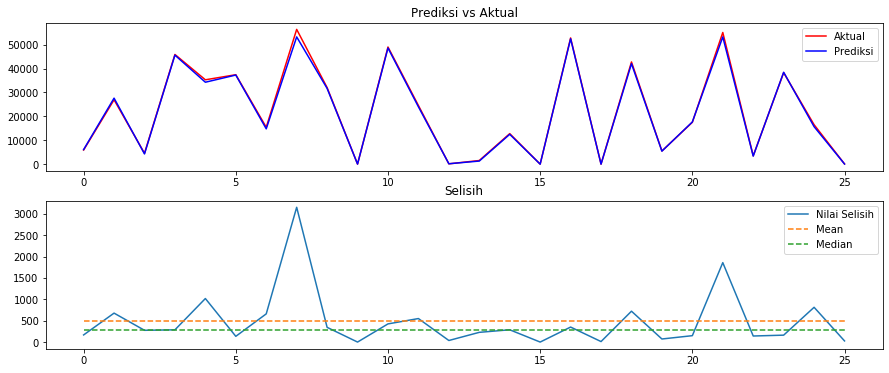

In [102]:
visualisasiPrediksi(case_y_test,prediction)

# Matrix Evaluation

* **MAE** (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* **MSE** (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* **MSLE** (Mean Squared Logarithmic Error) can be interpreted as a measure of the ratio between the true and predicted values.
* **R-squared** (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [41]:
def evaluasiPrediksi(y_true,y_pred):
    print(f'MAE (Mean Absolute Error) : {mean_absolute_error(y_true,y_pred)}')
    print(f'MSE (Mean Squared Error) : {mean_squared_error(y_true,y_pred)}')
    print(f'MSLE (Mean Squared Absolute Error) : {mean_squared_log_error(y_true,y_pred)}')
    print(f'r2 (R-Squared) : {r2_score(y_true,y_pred)}')

In [42]:
evaluasiPrediksi(case_y_test,prediction)

MAE (Mean Absolute Error) : 616.3615384615384
MSE (Mean Squared Error) : 1169981.2346153846
MSLE (Mean Squared Absolute Error) : 0.046285868532596516
r2 (R-Squared) : 0.9969421335341513


# Peningkatan Model

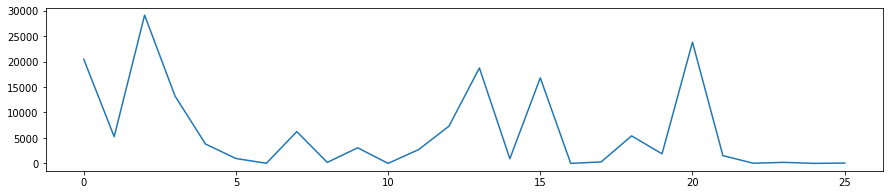

In [64]:
plt.figure(figsize=(15,3))
plt.plot(range(len(recovered_y_test)),recovered_y_test)

RandomForestRegressor, n_estimator : 10
MAE (Mean Absolute Error) : 181.24230769230766
MSE (Mean Squared Error) : 85029.75192307694
MSLE (Mean Squared Absolute Error) : 0.010537563910844906
r2 (R-Squared) : 0.9987845747123865


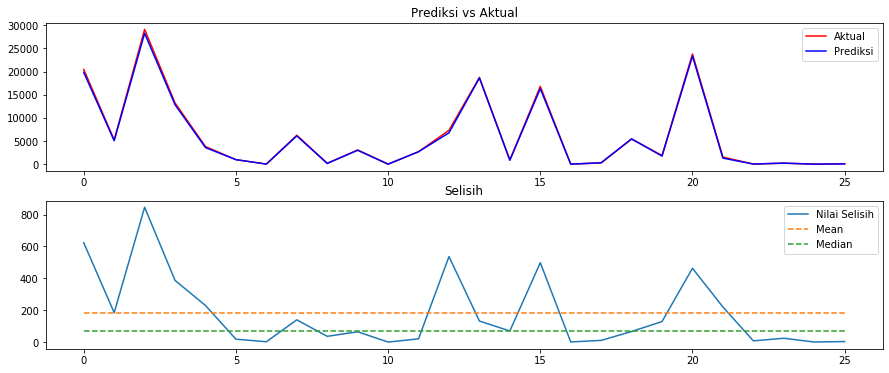

RandomForestRegressor, n_estimator : 20
MAE (Mean Absolute Error) : 127.39423076923077
MSE (Mean Squared Error) : 47793.431250000074
MSLE (Mean Squared Absolute Error) : 0.01379933179494462
r2 (R-Squared) : 0.9993168350652649


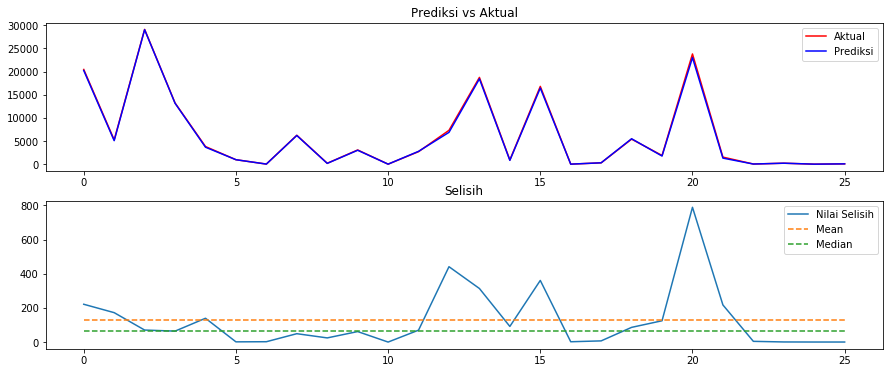

RandomForestRegressor, n_estimator : 30
MAE (Mean Absolute Error) : 142.73076923076923
MSE (Mean Squared Error) : 57354.68547008552
MSLE (Mean Squared Absolute Error) : 0.009302545380161483
r2 (R-Squared) : 0.999180165371451


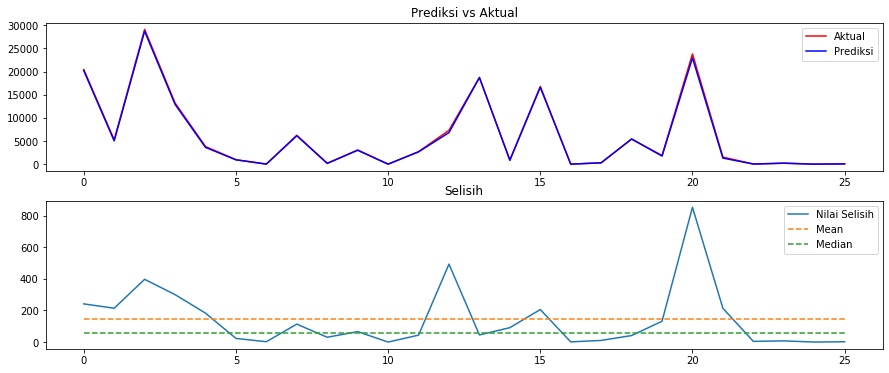

RandomForestRegressor, n_estimator : 40
MAE (Mean Absolute Error) : 175.9384615384615
MSE (Mean Squared Error) : 90098.84466346152
MSLE (Mean Squared Absolute Error) : 0.018132907203993652
r2 (R-Squared) : 0.9987121165037879


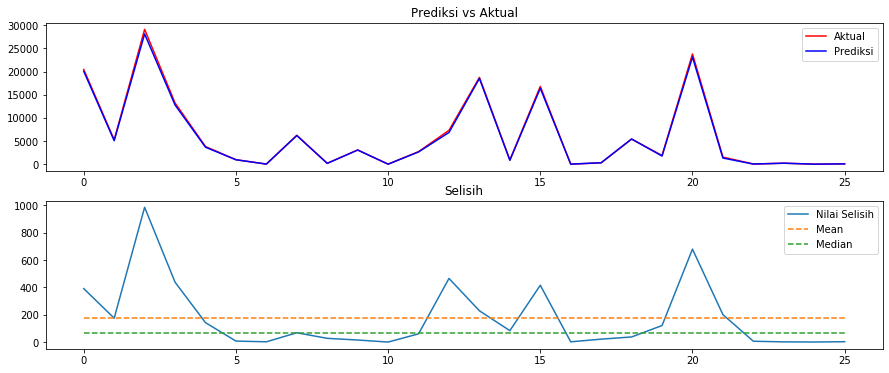

RandomForestRegressor, n_estimator : 50
MAE (Mean Absolute Error) : 156.9715384615386
MSE (Mean Squared Error) : 66115.81613846164
MSLE (Mean Squared Absolute Error) : 0.015285475886366917
r2 (R-Squared) : 0.9990549327379128


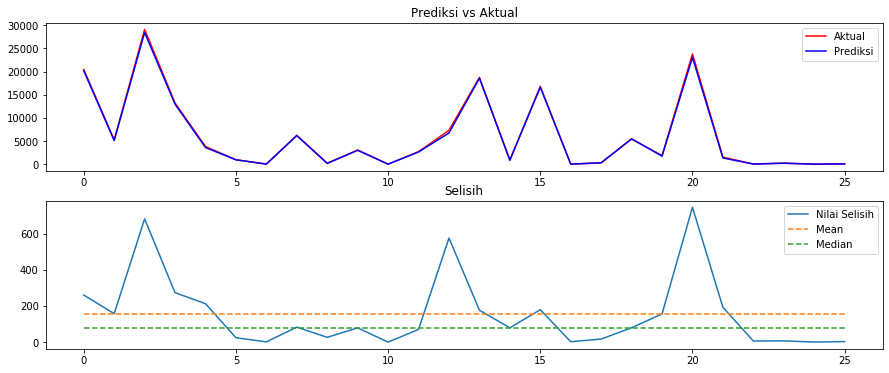

RandomForestRegressor, n_estimator : 60
MAE (Mean Absolute Error) : 135.21346153846156
MSE (Mean Squared Error) : 48796.49383547004
MSLE (Mean Squared Absolute Error) : 0.01276850871833295
r2 (R-Squared) : 0.9993024971705414


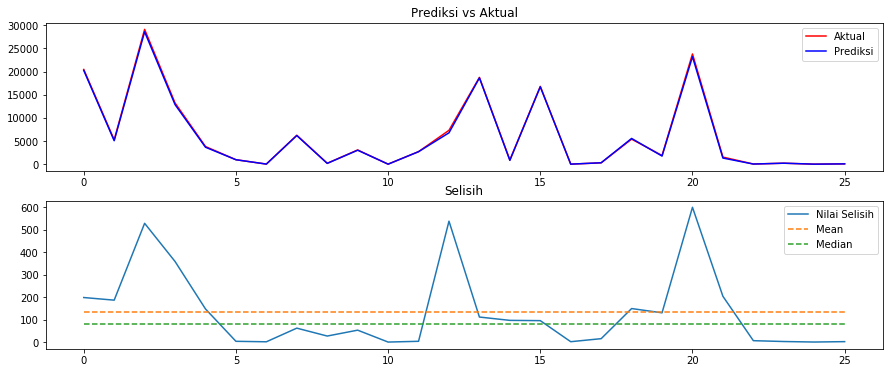

RandomForestRegressor, n_estimator : 70
MAE (Mean Absolute Error) : 181.44725274725275
MSE (Mean Squared Error) : 109460.66879120891
MSLE (Mean Squared Absolute Error) : 0.0173055824077552
r2 (R-Squared) : 0.9984353563095387


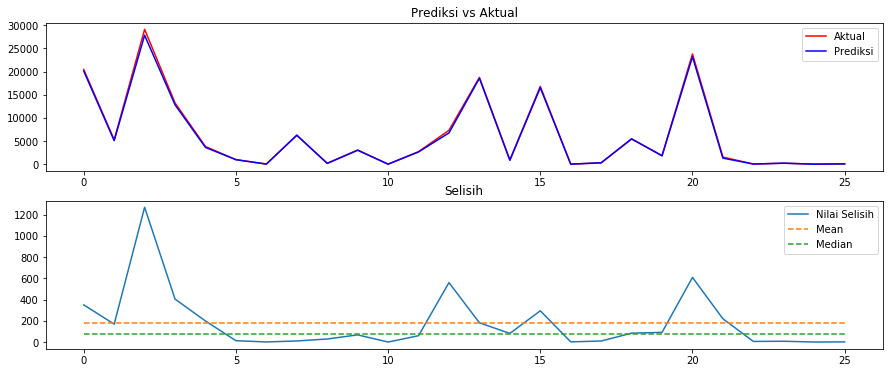

RandomForestRegressor, n_estimator : 80
MAE (Mean Absolute Error) : 160.59326923076935
MSE (Mean Squared Error) : 64409.73718750004
MSLE (Mean Squared Absolute Error) : 0.021743710502581212
r2 (R-Squared) : 0.9990793196313562


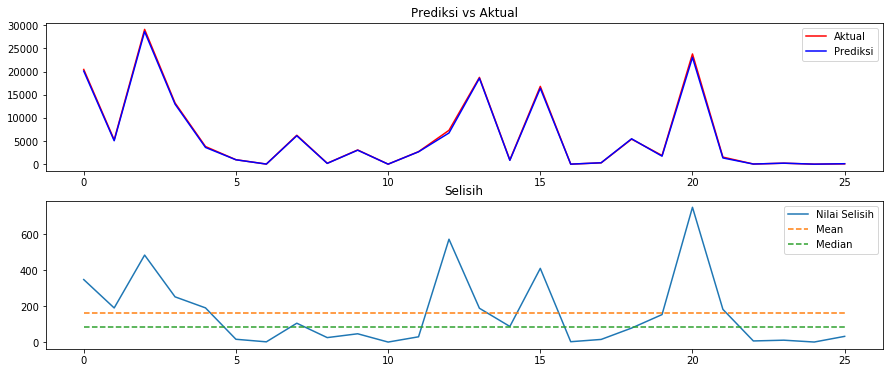

RandomForestRegressor, n_estimator : 90
MAE (Mean Absolute Error) : 161.89871794871772
MSE (Mean Squared Error) : 74562.97361348505
MSLE (Mean Squared Absolute Error) : 0.022351629320167227
r2 (R-Squared) : 0.9989341880741758


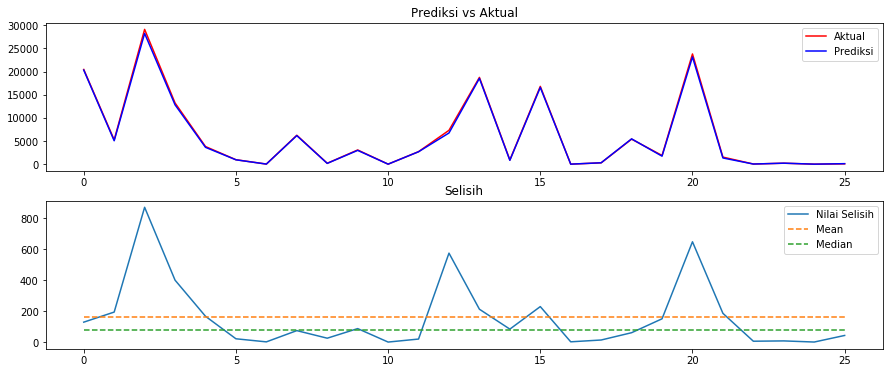

In [139]:
# Mencoba dengan n_estimator 10-100
for n in range(10,100,10):
    model = RandomForestRegressor(n_estimators=n)
    model.fit(recovered_x_train,recovered_y_train)
    prediction = model.predict(recovered_x_test)

    print(f'RandomForestRegressor, n_estimator : {n}')
    evaluasiPrediksi(recovered_y_test,prediction)
    visualisasiPrediksi(recovered_y_test,prediction)

# Prediksi Semua Data

Sekarang Memprediksi : Total Kasus
MAE (Mean Absolute Error) : 555.353846153846
MSE (Mean Squared Error) : 980589.1226495734
MSLE (Mean Squared Absolute Error) : 0.01017559580892169
r2 (R-Squared) : 0.9974371293263419
    Day  Month  Year
4     6      3  2020
7     9      3  2020
9    11      3  2020
12   14      3  2020
14   16      3  2020


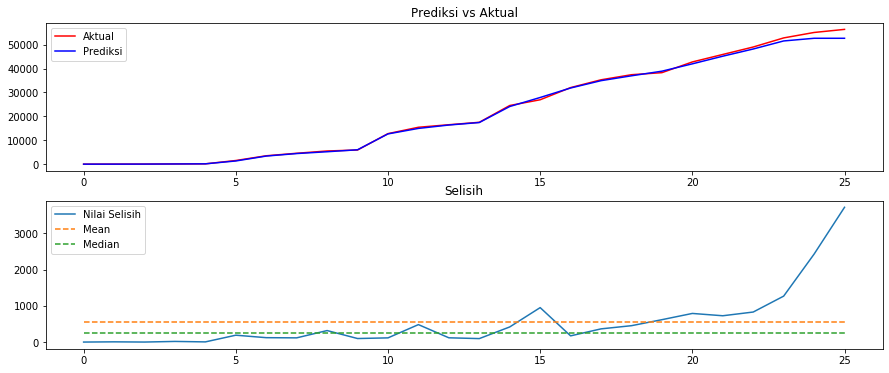

Sekarang Memprediksi : Total Kematian
MAE (Mean Absolute Error) : 15.737179487179485
MSE (Mean Squared Error) : 447.4781623931623
MSLE (Mean Squared Absolute Error) : 0.015185056716364139
r2 (R-Squared) : 0.9993378174724521
    Day  Month  Year
5     7      3  2020
10   12      3  2020
12   14      3  2020
26   28      3  2020
27   29      3  2020


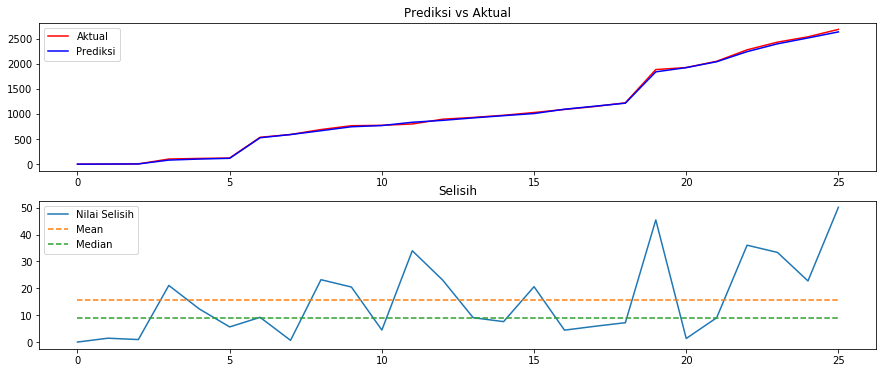

Sekarang Memprediksi : Total Sembuh
MAE (Mean Absolute Error) : 142.12564102564113
MSE (Mean Squared Error) : 51808.68521367529
MSLE (Mean Squared Absolute Error) : 0.013992086013933898
r2 (R-Squared) : 0.9992594405522472
    Day  Month  Year
4     6      3  2020
6     8      3  2020
11   13      3  2020
18   20      3  2020
20   22      3  2020


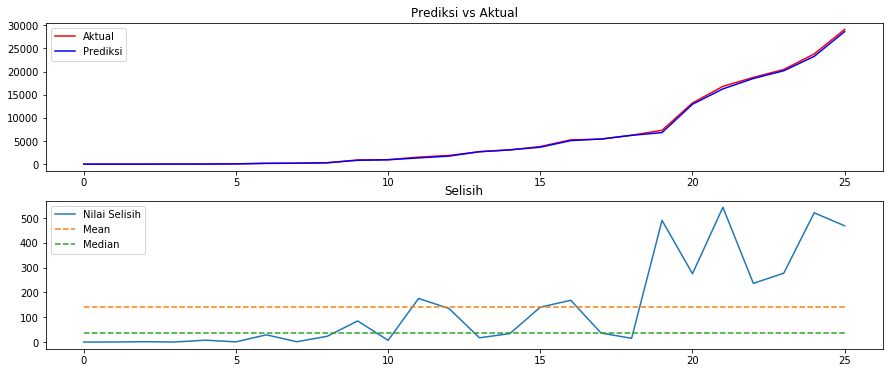

Sekarang Memprediksi : Total Aktif
MAE (Mean Absolute Error) : 238.4205128205128
MSE (Mean Squared Error) : 124248.47581196568
MSLE (Mean Squared Absolute Error) : 0.0021850692179653597
r2 (R-Squared) : 0.9982566869822999
    Day  Month  Year
0     2      3  2020
1     3      3  2020
21   23      3  2020
27   29      3  2020
41   12      4  2020


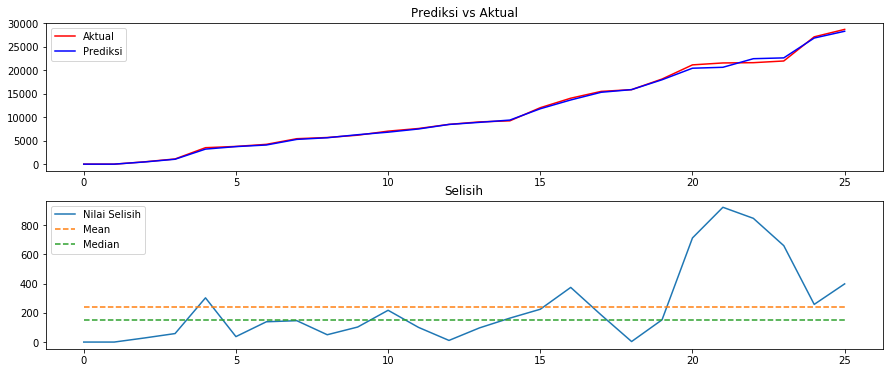

Sekarang Memprediksi : Tingkat Kesembuhan
MAE (Mean Absolute Error) : 0.6715384615384624
MSE (Mean Squared Error) : 1.221598495726496
MSLE (Mean Squared Absolute Error) : 0.08685304894468275
r2 (R-Squared) : 0.9940704563013003
    Day  Month  Year
4     6      3  2020
5     7      3  2020
7     9      3  2020
12   14      3  2020
13   15      3  2020


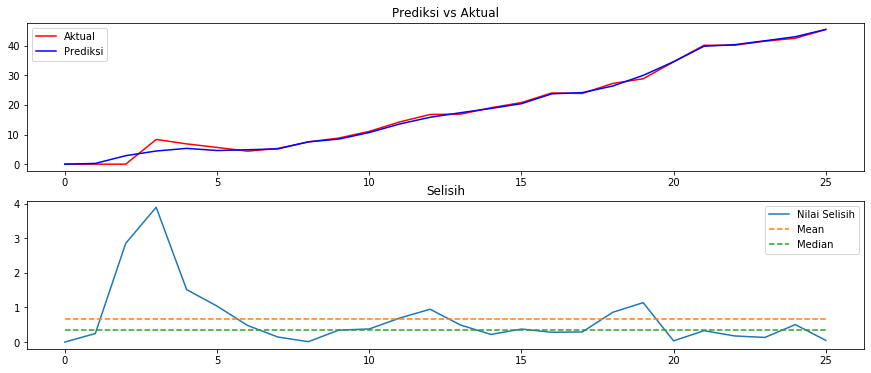

Sekarang Memprediksi : Tingkat Kematian
MAE (Mean Absolute Error) : 0.13047435897435897
MSE (Mean Squared Error) : 0.07163416666666668
MSLE (Mean Squared Absolute Error) : 0.0008158691076570484
r2 (R-Squared) : 0.9865371891547012
    Day  Month  Year
0     2      3  2020
1     3      3  2020
20   22      3  2020
24   26      3  2020
29   31      3  2020


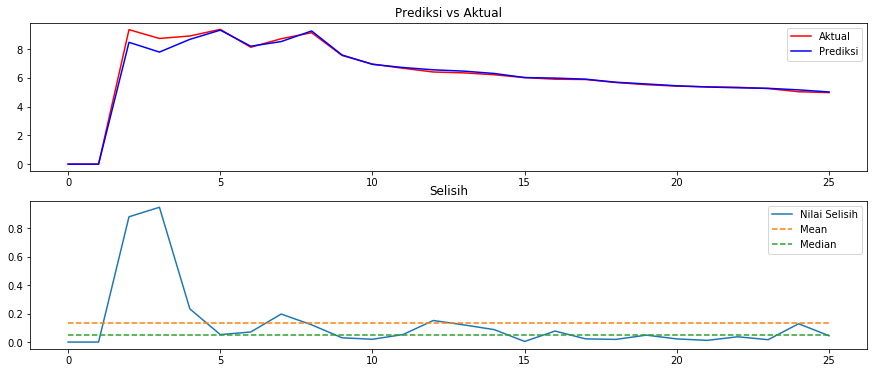

In [140]:
all_models = []
for data in semua_data:
    print(f'Sekarang Memprediksi : {data[4]}')
    model = RandomForestRegressor(n_estimators=30)
    
    # model.fit(x_train,y_train)
    model.fit(data[0],data[2])
    
    # model.predict(x_test)
    prediction = model.predict(data[1])
    
    # evaluasi y_test (y_true) vs prediksi
    evaluasiPrediksi(data[3],prediction)
    print(data[1].head())
    visualisasiPrediksi(data[3],prediction)
    all_models.append((data[4],model))

# Save Models

In [116]:
all_models

[('Total Kasus',
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)),
 ('Total Kematian',
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)),
 ('To

In [117]:
import pickle

In [118]:
for mod in all_models:
    with open(f'models/covid19/{mod[0]}.pkl','wb') as file:
        pickle.dump(mod[1],file)
        print(f'Saved Model : {mod[0]}')

Saved Model : Total Kasus
Saved Model : Total Kematian
Saved Model : Total Sembuh
Saved Model : Total Aktif
Saved Model : Tingkat Kesembuhan
Saved Model : Tingkat Kematian


# Prediksi

In [119]:
tanggal = pd.date_range(start='2020-07-08',end='2020-08-08')

In [120]:
tanggal

DatetimeIndex(['2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15',
               '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19',
               '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
               '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27',
               '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
               '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
               '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08'],
              dtype='datetime64[ns]', freq='D')

In [121]:
tanggal.dtype

dtype('<M8[ns]')

In [122]:
tanggal_depan = pd.DataFrame(tanggal,columns=['Date'])

In [123]:
tanggal_depan['Day'] = tanggal_depan.Date.dt.day
tanggal_depan['Month'] = tanggal_depan.Date.dt.month
tanggal_depan['Year'] = tanggal_depan.Date.dt.year
tanggal_depan.drop('Date',axis=1,inplace=True)

In [124]:
tanggal_depan.head(10)

,Day,Month,Year
0,8,7,2020
1,9,7,2020
2,10,7,2020
3,11,7,2020
4,12,7,2020
5,13,7,2020
6,14,7,2020
7,15,7,2020
8,16,7,2020
9,17,7,2020


In [125]:
prediksi_final = pd.DataFrame(tanggal,columns=['Date'])

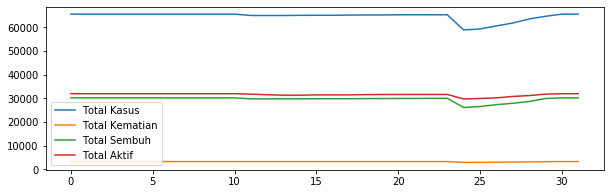

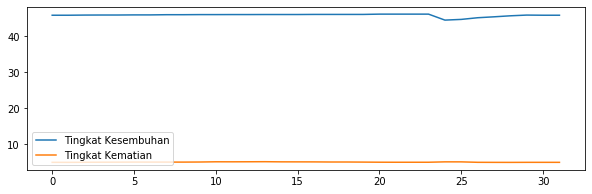

In [158]:
plt.figure(figsize=(10,3))
for model in all_models[:-2]:
    prediction = model[1].predict(tanggal_depan)
    plt.plot(range(len(prediction)),prediction,label=model[0])
    prediksi_final[model[0]] = prediction
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(10,3))
for model in all_models[-2:]:
    prediction = model[1].predict(tanggal_depan)
    plt.plot(range(len(prediction)),prediction,label=model[0])
    prediksi_final[model[0]] = prediction
plt.legend(loc='lower left')
plt.show()

In [142]:
dataframe.tail()

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Case Fatality Rate,Case Recovered Rate,Day,Month,Year
123,2020-07-03,60695,3036,27568,30091,5.00,45.42,3,7,2020
124,2020-07-04,62142,3089,28219,30834,4.97,45.41,4,7,2020
125,2020-07-05,63749,3171,29105,31473,4.97,45.66,5,7,2020
126,2020-07-06,64958,3241,29919,31798,4.99,46.06,6,7,2020
127,2020-07-07,66226,3309,30785,32132,5.00,46.48,7,7,2020


In [143]:
prediksi_final

,Date,Total Kasus,Total Kematian,Total Sembuh,Total Aktif,Tingkat Kesembuhan,Tingkat Kematian
0,2020-07-08,65575.300000,3267.333333,30190.233333,31944.600000,45.898667,5.028667
1,2020-07-09,65575.300000,3267.333333,30190.233333,31944.600000,45.898667,5.021000
2,2020-07-10,65575.300000,3267.333333,30190.233333,31944.600000,45.942333,5.045000
3,2020-07-11,65575.300000,3267.333333,30190.233333,31944.600000,45.957333,5.064667
4,2020-07-12,65575.300000,3267.333333,30190.233333,31944.600000,45.957333,5.078000
5,2020-07-13,65575.300000,3267.333333,30190.233333,31944.600000,45.991000,5.097667
6,2020-07-14,65575.300000,3267.333333,30190.233333,31944.600000,45.991000,5.095333
7,2020-07-15,65575.300000,3267.333333,30190.233333,31944.600000,46.047000,5.096000
8,2020-07-16,65575.300000,3267.333333,30190.233333,31944.600000,46.047000,5.093000
9,2020-07-17,65575.300000,3267.333333,30190.233333,31944.600000,46.073333,5.116667
